In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('2010_2011.csv', encoding='unicode_escape')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df_2=df.drop(columns=['Invoice','Customer ID','Country'])
df_2['Revenue']=df_2['Quantity']*df_2['Price']
df_2.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Revenue
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,15.30
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,20.34


In [5]:
df_2['InvoiceDate'] = pd.to_datetime(df_2['InvoiceDate'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    541910 non-null  object        
 1   Description  540456 non-null  object        
 2   Quantity     541910 non-null  int64         
 3   InvoiceDate  541910 non-null  datetime64[ns]
 4   Price        541910 non-null  float64       
 5   Revenue      541910 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 24.8+ MB


In [6]:
df_2['year'] = pd.DatetimeIndex(df_2['InvoiceDate']).year
df_2['month'] = pd.DatetimeIndex(df_2['InvoiceDate']).month
df_2.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Revenue,year,month
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,2010,12
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,2010,12
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,2010,12
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,2010,12
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,2010,12


In [7]:
df_3=df_2.groupby(['StockCode','year','month'])['Revenue'].sum().to_frame().reset_index()
df_3["month"] = df_3.month.map("{:02}".format)
df_3.head()

,StockCode,year,month,Revenue
0,10002,2010,12,234.41
1,10002,2011,01,291.37
2,10002,2011,02,45.76
3,10002,2011,03,27.70
4,10002,2011,04,160.65


In [8]:
df_3['year_month']=df_3['year'].map(str) + '-' + df_3['month'].map(str)
df_3.head()

,StockCode,year,month,Revenue,year_month
0,10002,2010,12,234.41,2010-12
1,10002,2011,01,291.37,2011-01
2,10002,2011,02,45.76,2011-02
3,10002,2011,03,27.70,2011-03
4,10002,2011,04,160.65,2011-04


In [9]:
df_3 = df_3.pivot(index='StockCode',columns='year_month', values='Revenue').reset_index().fillna(0)
df_3.head()

year_month,StockCode,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,10002,234.41,291.37,45.76,27.70,160.65,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00
1,10080,0.00,0.00,1.70,0.00,0.00,0.00,23.4,9.36,23.40,23.4,2.34,35.49,0.00
2,10120,3.36,0.00,6.30,6.09,0.00,0.63,0.0,1.05,7.35,2.1,2.10,10.29,1.26
3,10123C,0.65,0.00,0.00,2.60,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00
4,10123G,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00


In [10]:
#calculate total sales:
df_3['total_sales'] = df_3.iloc[:,1:13].sum(axis=1,numeric_only=True)
df_3.head()

year_month,StockCode,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,total_sales
0,10002,234.41,291.37,45.76,27.70,160.65,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,759.89
1,10080,0.00,0.00,1.70,0.00,0.00,0.00,23.4,9.36,23.40,23.4,2.34,35.49,0.00,119.09
2,10120,3.36,0.00,6.30,6.09,0.00,0.63,0.0,1.05,7.35,2.1,2.10,10.29,1.26,39.27
3,10123C,0.65,0.00,0.00,2.60,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,3.25
4,10123G,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00


In [11]:
d=len(df_3.columns)
d
15

#calculate average monthly sales:
df_3['average_sales'] = df_3['total_sales']/13
#calculate standard deviation:
df_3['std_dev'] = df_3.iloc[:,1:13].std(axis=1)
df_3.head()

year_month,StockCode,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,total_sales,average_sales,std_dev
0,10002,234.41,291.37,45.76,27.70,160.65,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,759.89,58.453077,104.618273
1,10080,0.00,0.00,1.70,0.00,0.00,0.00,23.4,9.36,23.40,23.4,2.34,35.49,0.00,119.09,9.160769,12.849925
2,10120,3.36,0.00,6.30,6.09,0.00,0.63,0.0,1.05,7.35,2.1,2.10,10.29,1.26,39.27,3.020769,3.434883
3,10123C,0.65,0.00,0.00,2.60,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,3.25,0.250000,0.756925
4,10123G,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000


In [12]:
df_3['CoV']=df_3['std_dev']/df_3['average_sales']

In [13]:
def condition_xyz(x):
    if x<=0.5:
        return "X"
    elif x>=0.5 and x<=1:
        return "Y"
    else:
        return 'Z'

In [14]:
df_3['XYZ']=df_3['CoV'].apply(condition_xyz)
df_3.head(10)

year_month,StockCode,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,total_sales,average_sales,std_dev,CoV,XYZ
0,10002,234.41,291.37,45.76,27.70,160.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,759.89,58.453077,104.618273,1.789782,Z
1,10080,0.00,0.00,1.70,0.00,0.00,0.00,23.40,9.36,23.40,23.40,2.34,35.49,0.00,119.09,9.160769,12.849925,1.402712,Z
2,10120,3.36,0.00,6.30,6.09,0.00,0.63,0.00,1.05,7.35,2.10,2.10,10.29,1.26,39.27,3.020769,3.434883,1.137089,Z
3,10123C,0.65,0.00,0.00,2.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.25,0.250000,0.756925,3.027700,Z
4,10123G,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,NaN,Z
5,10124A,1.68,0.00,1.26,2.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.68,0.00,6.72,0.516923,0.846340,1.637264,Z
6,10124G,2.10,0.00,0.00,1.68,0.00,0.00,0.00,0.00,0.00,1.68,0.00,1.68,0.00,7.14,0.549231,0.885689,1.612599,Z
7,10125,90.86,109.65,0.00,98.46,69.70,90.95,14.31,151.23,72.25,178.50,44.13,52.70,22.10,972.74,74.826154,51.463534,0.687775,Y
8,10133,85.27,113.84,34.71,70.55,65.38,28.05,266.60,412.46,370.89,92.27,0.00,0.00,0.00,1540.02,118.463077,141.776855,1.196802,Z
9,10134,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,NaN,Z


In [15]:
df_4 = df_3.groupby('StockCode').agg(total_revenue=('total_sales','sum')).sort_values(by='total_revenue', ascending=False).reset_index()

In [16]:
df_4['rev_cum_sum'] = df_4['total_revenue'].cumsum()
df_4['rev_all'] = df_4['total_revenue'].sum()
df_4['sku_rev_percent'] = df_4['rev_cum_sum']/df_4['rev_all']
df_4.head(100)

,StockCode,total_revenue,rev_cum_sum,rev_all,sku_rev_percent
0,DOT,186372.79,186372.79,9314079.924,0.020010
1,22423,158859.27,345232.06,9314079.924,0.037066
2,47566,97384.50,442616.56,9314079.924,0.047521
3,85123A,95671.04,538287.60,9314079.924,0.057793
4,85099B,90160.33,628447.93,9314079.924,0.067473
...,...,...,...,...,...
95,21479,17891.61,3085381.52,9314079.924,0.331260
96,20726,17800.60,3103182.12,9314079.924,0.333171
97,21843,17748.35,3120930.47,9314079.924,0.335077
98,20914,17617.71,3138548.18,9314079.924,0.336968


In [17]:
def condition_abc(x):
    if x>0 and x<=0.80:
        return "A"
    elif x>0.80 and x<=0.90:
        return "B"
    else:
        return 'C'


df_4['ABC']=df_4['sku_rev_percent'].apply(condition_abc)
df_4.tail(10)

,StockCode,total_revenue,rev_cum_sum,rev_all,sku_rev_percent,ABC
4060,35400,-45.700,9608787.893,9314079.924,1.031641,C
4061,85063,-46.850,9608741.043,9314079.924,1.031636,C
4062,79323W,-54.000,9608687.043,9314079.924,1.031630,C
4063,S,-3049.390,9605637.653,9314079.924,1.031303,C
4064,D,-5667.540,9599970.113,9314079.924,1.030694,C
4065,CRUK,-6832.990,9593137.123,9314079.924,1.029961,C
4066,BANK CHARGES,-7190.639,9585946.484,9314079.924,1.029189,C
4067,B,-11062.060,9574884.424,9314079.924,1.028001,C
4068,M,-68706.960,9506177.464,9314079.924,1.020624,C
4069,AMAZONFEE,-192097.540,9314079.924,9314079.924,1.000000,C


In [18]:
df_4_check = df_4.groupby('ABC').agg(total_revenue=('total_revenue', sum)).reset_index()
df_4_check
df_3.head()

year_month,StockCode,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,total_sales,average_sales,std_dev,CoV,XYZ
0,10002,234.41,291.37,45.76,27.70,160.65,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,759.89,58.453077,104.618273,1.789782,Z
1,10080,0.00,0.00,1.70,0.00,0.00,0.00,23.4,9.36,23.40,23.4,2.34,35.49,0.00,119.09,9.160769,12.849925,1.402712,Z
2,10120,3.36,0.00,6.30,6.09,0.00,0.63,0.0,1.05,7.35,2.1,2.10,10.29,1.26,39.27,3.020769,3.434883,1.137089,Z
3,10123C,0.65,0.00,0.00,2.60,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,3.25,0.250000,0.756925,3.027700,Z
4,10123G,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,NaN,Z


In [19]:
df_3_to_merge = df_3[['StockCode','total_sales','average_sales','std_dev','CoV','XYZ']]
df_4_to_merge = df_4[['StockCode','total_revenue','ABC']]
df_final = df_4_to_merge.merge(df_3_to_merge, on = 'StockCode', how='left')
df_final.head()

,StockCode,total_revenue,ABC,total_sales,average_sales,std_dev,CoV,XYZ
0,DOT,186372.79,A,186372.79,14336.368462,8034.060076,0.560397,Y
1,22423,158859.27,A,158859.27,12219.943846,4911.139278,0.401895,X
2,47566,97384.50,A,97384.50,7491.115385,5418.944667,0.723383,Y
3,85123A,95671.04,A,95671.04,7359.310769,3721.395943,0.505672,Y
4,85099B,90160.33,A,90160.33,6935.410000,2500.506422,0.360542,X


In [20]:
df_final['ABC_XYZ']=df_final['ABC'].astype(str) + df_final['XYZ'].astype(str)
df_final.head()

,StockCode,total_revenue,ABC,total_sales,average_sales,std_dev,CoV,XYZ,ABC_XYZ
0,DOT,186372.79,A,186372.79,14336.368462,8034.060076,0.560397,Y,AY
1,22423,158859.27,A,158859.27,12219.943846,4911.139278,0.401895,X,AX
2,47566,97384.50,A,97384.50,7491.115385,5418.944667,0.723383,Y,AY
3,85123A,95671.04,A,95671.04,7359.310769,3721.395943,0.505672,Y,AY
4,85099B,90160.33,A,90160.33,6935.410000,2500.506422,0.360542,X,AX


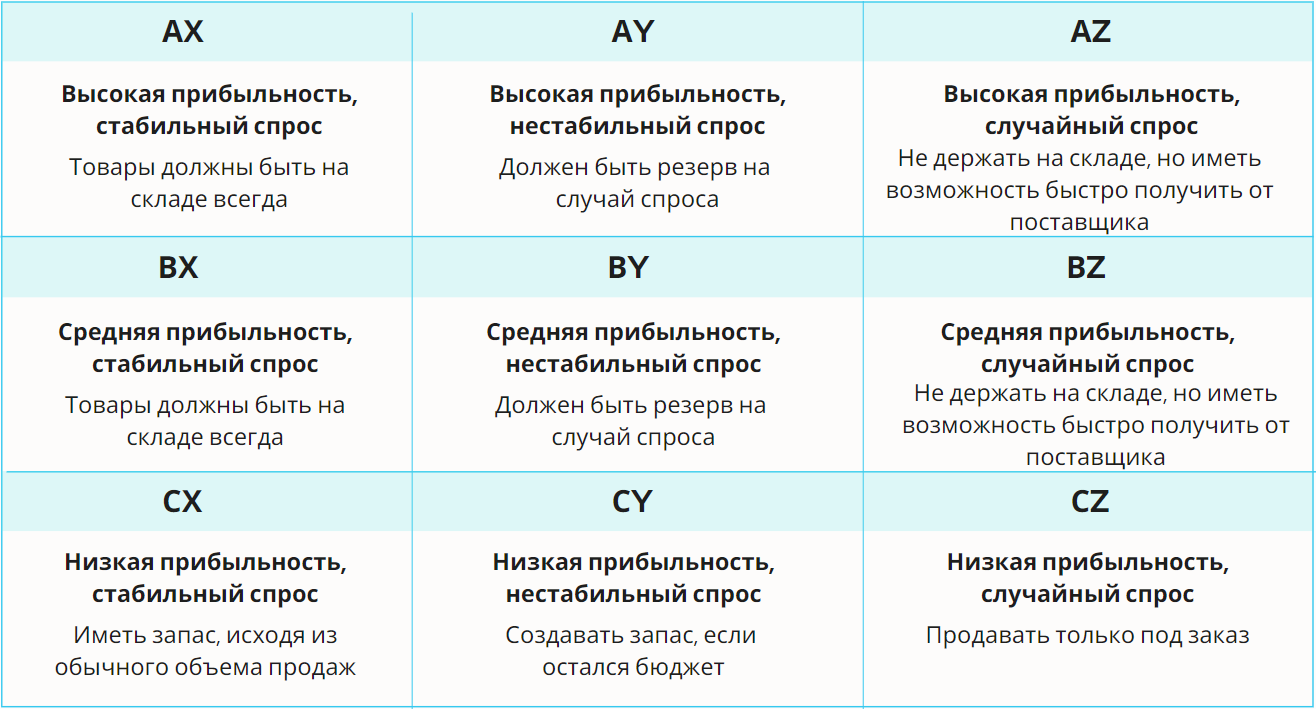

In [21]:
df_final_check = df_final.groupby('ABC_XYZ').agg(
total_sales=('total_sales',sum),
average_sales =('average_sales',sum)).reset_index().sort_values(by='total_sales', ascending=False)
df_final_check

,ABC_XYZ,total_sales,average_sales
1,AY,3190593.560,245430.273846
2,AZ,2164690.390,166514.645385
0,AX,2094080.730,161083.133077
8,CZ,719888.753,55376.057923
5,BZ,459023.810,35309.523846
7,CY,442061.860,34004.758462
4,BY,335292.860,25791.758462
3,BX,137456.620,10573.586154
6,CX,-229008.659,-17616.050692
